## Intro to Time Series

Forecasting is the process of making predictions based on past and present data. Good forecasts capture the genuine patterns and relationships which exist in the historical data, but do not replicate past events that will not occur again.

There is a difference between a **random fluctuation** and a **genuine pattern** that should be modelled and extrapolated.

#### Time series graphics
The first thing we shoud do in quantitative forecasting is understand the data. This can be done with exploration analysis.
We should look for:
1. Patterns
2. Unusual observations
2. Changes over time
4. Relationships between variables.

#### Time Series Patterns

1. Trend: Long term increase or decrease, does not have to be linear.
2. Seasonal: The series is affected by a seasonal pattern, like fridays on beer consumption.
3. Cyclical: Rises and falls on a that are not of a fixed frequency.

Patterns help us build good models.

In [1]:
# libraries needes for case studies
import pandas as pd # Pandas is the python library for working with and visualizing time series
import numpy as np # Numpy is a library for matricial operations and high-level mathematical functions
import matplotlib.pyplot as plt # Matplot lib is the basic python graphic library
import plotly.express as px # Ploty is a another graphic library
import seaborn as sns # Ploty a graphic library focused on pandas dataframe and based on matplotlib
import scipy.stats as stats # statistical module from scipy
import statsmodels.api as sm # statistical models library
import pyreadr # module for reading different data types, including r data

# Global parameters for plt graphics
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = [10,6]

### Time series regression models
Time series can be thought as a list of numbers indexed by time.

The basic idea of regression is that we try to **explain** a time series $y$ assuming a linear relationship with another time series $x$.

For example we might try to forecast the GDP $y$ using employment $X_1$ and interest rate $X_2$

True Intercept: 10	 True Linear Coef: 0.5
Est. Intercept: 11.91	 Est. Linear Coef: 0.47


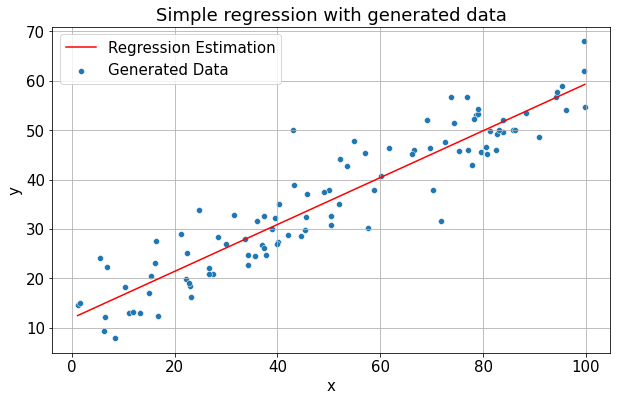

In [2]:
# artificial example for linear regression
x = stats.uniform.rvs(0,100,size = 100) # x is sample from a uniform distribuiton
error = stats.norm.rvs(0,5, size = 100) # error has a normal distribution in our case
b0 = 10
b1 = 0.5
# generating predictable variable
y = b0 + b1*x + error

## Crating Ordinary Least Squares (OLS) model
X = sm.add_constant(x)
model = sm.OLS(y,X)
result_model = model.fit()
# predicting results
y_pred = result_model.predict(X)

# Transforming it all on da Data Frame
generated_data = pd.DataFrame(np.array([x,y,y_pred]).T, columns = ['x','y','y_pred'])

# Ploting the regression
sns.scatterplot(data = generated_data, x = 'x', y = 'y', label = 'Generated Data')
sns.lineplot(data = generated_data, x = 'x', y = 'y_pred',color = 'r', label = 'Regression Estimation')
plt.title('Simple regression with generated data')
plt.grid();

# Comparing the true values ans their estimations
print(f'True Intercept: {b0}\t True Linear Coef: {b1}')
b0_est, b1_est = result_model.params
print(f'Est. Intercept: {b0_est:.2f}\t Est. Linear Coef: {b1_est:.2f}')


### Example: US consumption expenditure

The plot below shows time series of quarterly percentage changes (growth rates) of real personal consumption expenditure, $y$, and real personal disposable income, $x$, for the US from 1970 Q1 to 2016 Q3.

In [58]:
# Reading Data
rdata = pyreadr.read_r(r"data/uschange.rda")
uschange_data = rdata['uschange']

# generating time index and indexing data
quarters = pd.date_range('1970', periods=len(uschange_data), freq = 'Q')
uschange_data.index = quarters
print(uschange_data.head(6))
px.line(uschange_data,x = uschange_data.index, y =  ['Consumption'], 
        title = 'US real personal consumption expenditure and real personal disposable income changes')


            Consumption    Income  Production   Savings  Unemployment
1970-03-31     0.615986  0.972261   -2.452700  4.810312           0.9
1970-06-30     0.460376  1.169085   -0.551525  7.287992           0.5
1970-09-30     0.876791  1.553271   -0.358708  7.289013           0.5
1970-12-31    -0.274245 -0.255272   -2.185455  0.985230           0.7
1971-03-31     1.897371  1.987154    1.909734  3.657771          -0.1
1971-06-30     0.911993  1.447334    0.901536  6.051342          -0.1


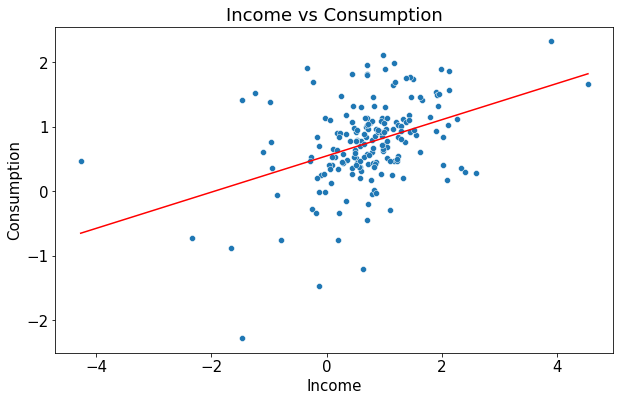

In [5]:
X = sm.add_constant(uschange_data.loc[:,['Income']].to_numpy())
model = sm.OLS(uschange_data['Consumption'].to_numpy(),X)
result_model = model.fit()
y_pred = result_model.predict(X)

sns.lineplot(data = uschange_data, x = 'Income', y = y_pred, color = 'r')
sns.scatterplot(data = uschange_data, x = 'Income', y = 'Consumption')
plt.title('Income vs Consumption');

### Least squares estimation

This is a usual method in statistics, we try to explain the target variable by linking it with another set of variables using linear parameters. The covariables, the variables $x_{i,t}$ that we use to adjust the model, can have a non-linear relation with the target variable $y_t$ but the parameters have to be linear. This property helps us in building and finding solution for the model, that can be done using linear algebra. The geneal model can be written as:

$$y_t = \beta_0 + \beta_1x_{1,t} + \dots + \beta_kx_{k,t} + \epsilon_t$$

Rearranging the expression, we can calculate the error in each prediction:

$$\epsilon_t = y_t - (\beta_0 + \beta_1x_{1,t} + \dots + \beta_kx_{k,t})$$

But we also can define the squared sum of errors from prediction with given a set of $\beta$ 's:

$$\Sigma_{i=0}^{t} \epsilon_t^2 = \Sigma_{i=0}^{t} (y_t - \beta_0 + \beta_1x_{1,t} + \dots + \beta_kx_{k,t})^2$$

A set of $\beta$ 's can be estimated by minimizing the square of estimation error. We will use the $\hat{\beta_0},\dots,\hat{\beta_k}$ notation for the estimated parameters.

### Adjusting the model
In the US consumption expenditure we have the following model:
$$y_t = \beta_0 + \beta_1x_{1,t} + \beta_2x_{2,t} + \beta_3x_{3,t} + \beta_4x_{4,t} + \epsilon_t$$

Where:
1. $y_t$:     Comsumption, thepercentage change in real personal consumption expenditure
2. $x_{1,t}$: Income, the percentage change in real personal disposable income  
3. $x_{2,t}$: Production, the percentage change in industrial production   
4. $x_{3,t}$: Savings, the percentage change in personal savings
5. $x_{4,t}$: Unemployment, the change in the unemployment rate

In [54]:
# Adjusting the model
y = uschange_data.iloc[:,0].to_numpy()
X = uschange_data.loc[:,['Income', 'Production', 'Savings', 'Unemployment']].to_numpy()
X = sm.add_constant(X)

model = sm.OLS(endog = y, exog = X)
result_model = model.fit()
# print(result_model.summary())

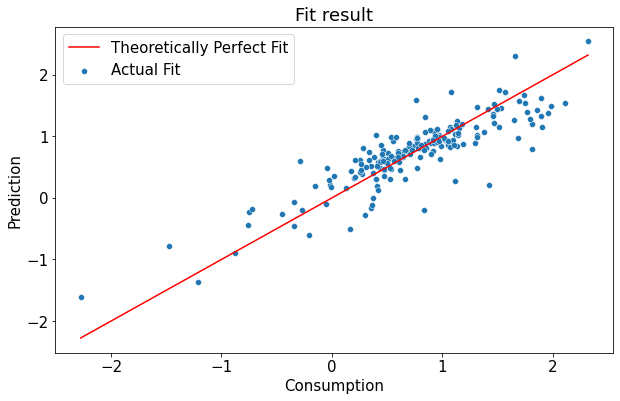

In [36]:
# Fit results plot
comparative_data = pd.DataFrame(np.array([y,y_pred]).T, columns = ['Consumption', 'Prediction'], index = quarters)

x_line = np.linspace(comparative_data['Consumption'].max(),comparative_data['Consumption'].min(), 10)
sns.scatterplot(data = comparative_data,x = 'Consumption',y = 'Prediction', label = 'Actual Fit')
plt.plot(x_line,x_line, color = 'red', label = 'Theoretically Perfect Fit')
plt.title('Fit result')
plt.legend();
px.line(comparative_data,x = uschange_data.index, y =  ['Consumption', 'Prediction'], 
        title = 'US real personal consumption expenditure prediction')

In [43]:
# Model Interpretation
print(result_model.summary())

y_pred = result_model.predict(X)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     139.5
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           2.62e-54
Time:                        11:34:43   Log-Likelihood:                -54.692
No. Observations:                 187   AIC:                             119.4
Df Residuals:                     182   BIC:                             135.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2673      0.037      7.184      0.0

There is a lot of information on a regression summary. 

First things first, **does the model predict something**?

We can calculate the proportion of $y$ that is explained by the combination of variables and the proportion that is resildual.
$$F = \frac{MS_{regression}}{MS_{residuals}}$$

MS stands for Mean Squares. The higher the F statistic more of the target variable is explained by the model. We estimate the probability of F being equals zero, the lower the prob more certainty we can have that our model can predict something.
With Prob (F-statistic) virtually equals 0, our model can actually predict something.

Second, how **good is our model**?

We can see it by the proportion of the 
$$R^2 = \frac{SS_{regression}}{SS_{Total}} = \frac{\Sigma(\hat{y_i} - \bar{y})^2}{\Sigma(y_i - \bar{y})^2}$$

SS stands for Sum of Squares. The proportion of squared deviation from the mean of our estimation and the real proportionThis values is always positive and between 0 and 1. I f we add new variables, the $R^2$ will always rise, but we lose precision on predition, so we need to 'punish' additions that don't aggregate to the model using the **adjusted** $R^2$. Our model generates the adjusted $R^2 = 0.75$, with is a high value, so we are quite good in predicting the Consumption.

But can we predict the model using less information? Using less variables?
We acan analyse each coefficient sepparetely: In effect, each coef is a estimation, with each observation we can estimate differente coefs, theoretcally if we do a lot of estimations the estimated value will have some variability, calculated by the standart error of each coefficient. The proportion of the estimated value and its variability is the t statistic. If this proportion is equals to zero than the coef can actually be irrelevant, the probability of t being 0 is the P>|t|. Production and Unemployment can be irrelevant in our estimation.

In [57]:
# Adjusting the model
y = uschange_data.iloc[:,0].to_numpy()
X = uschange_data.loc[:,['Income', 'Savings']].to_numpy()
X = sm.add_constant(X)

model = sm.OLS(endog = y, exog = X)
result_model = model.fit()
print(result_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     235.9
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           1.65e-51
Time:                        12:02:31   Log-Likelihood:                -66.978
No. Observations:                 187   AIC:                             140.0
Df Residuals:                     184   BIC:                             149.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2227      0.036      6.123      0.0